In [2]:
# run these commands in terminal before running the code:
# pip install numpy
# pip install pandas_datareader
# pip install yfinance
# pip install keras
# pip install Tensorflow


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [4]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

spy = pdr.get_data_yahoo('AAPL', start='2010-10-24', end='2019-12-23')
cm=spy.count
print(cm)

[*********************100%%**********************]  1 of 1 completed
<bound method DataFrame.count of                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-10-25  11.038929  11.128571  11.015714  11.030000   9.337990  392462000
2010-10-26  10.959643  11.062143  10.916071  11.001786   9.314107  392929600
2010-10-27  10.987500  11.067857  10.914286  10.993929   9.307455  399002800
2010-10-28  10.998214  11.000000  10.746429  10.901429   9.229145  551051200
2010-10-29  10.865357  10.924286  10.745357  10.749286   9.100337  430511200
...               ...        ...        ...        ...        ...        ...
2019-12-16  69.250000  70.197502  69.245003  69.964996  68.075264  128186000
2019-12-17  69.892502  70.442497  69.699997  70.102501  68.209068  114158400
2019-12-18  69.949997  70.474998  69.779999  69.934998  68.046082  116028400
2019-12-19  69.875000  70.294998  69.737503  70.004

In [6]:
# !pip install --upgrade pandas-datareader

In [7]:
spy=spy.reset_index()
spy.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-10-25,11.038929,11.128571,11.015714,11.030000,9.337990,392462000
1,1,2010-10-26,10.959643,11.062143,10.916071,11.001786,9.314107,392929600
2,2,2010-10-27,10.987500,11.067857,10.914286,10.993929,9.307455,399002800
3,3,2010-10-28,10.998214,11.000000,10.746429,10.901429,9.229145,551051200
4,4,2010-10-29,10.865357,10.924286,10.745357,10.749286,9.100337,430511200


In [8]:
spy=spy.drop(['Date','Adj Close'], axis=1)
spy.head()

,index,Open,High,Low,Close,Volume
0,0,11.038929,11.128571,11.015714,11.030000,392462000
1,1,10.959643,11.062143,10.916071,11.001786,392929600
2,2,10.987500,11.067857,10.914286,10.993929,399002800
3,3,10.998214,11.000000,10.746429,10.901429,551051200
4,4,10.865357,10.924286,10.745357,10.749286,430511200


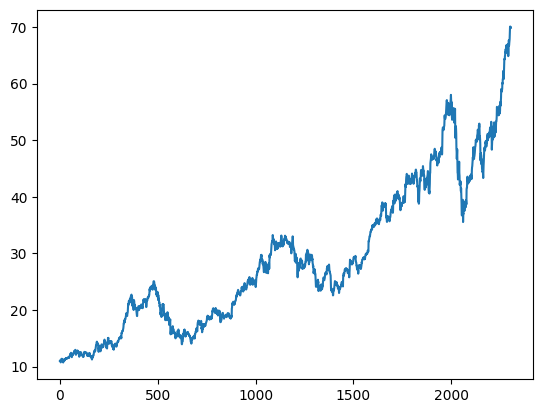

In [9]:
plt.plot(spy.Close)

In [10]:
ma100=spy.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2301    58.311225
2302    58.492900
2303    58.668050
2304    58.846150
2305    59.012150
Name: Close, Length: 2306, dtype: float64

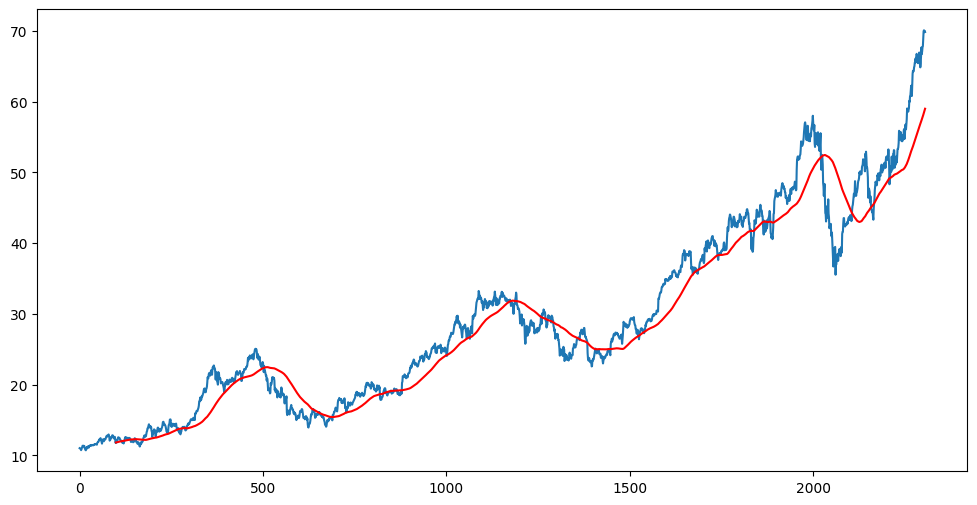

In [11]:
plt.figure(figsize=(12,6))
plt.plot(spy.Close)
plt.plot(ma100,'r')

In [12]:
ma200=spy.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2301    53.470750
2302    53.601850
2303    53.733375
2304    53.867775
2305    54.000938
Name: Close, Length: 2306, dtype: float64

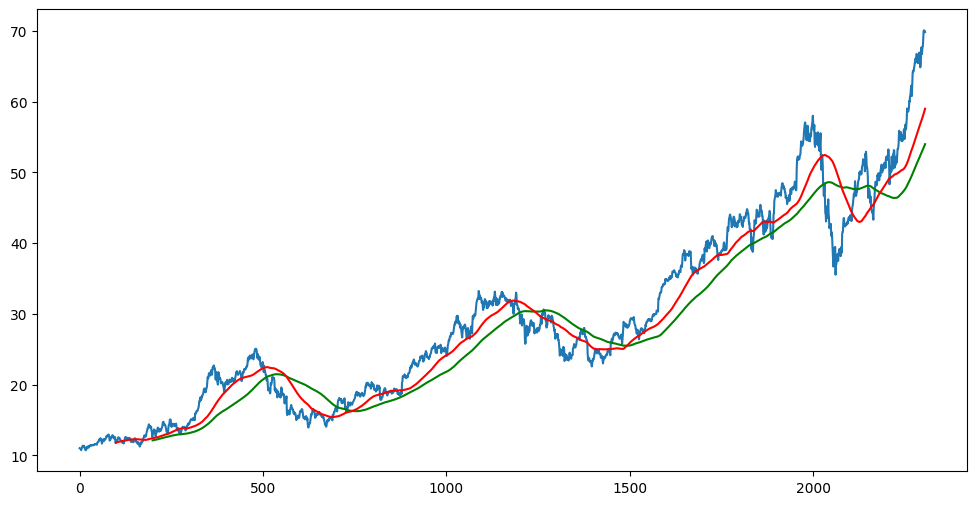

In [13]:
plt.figure(figsize=(12,6))
plt.plot(spy.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [14]:
#splitting data into training and testing

data_training=pd.DataFrame(spy['Close'][0:int(len(spy)*0.70)])
data_testing=pd.DataFrame(spy['Close'][int(len(spy)*0.70):int(len(spy))])

print(data_training.shape)
print(data_testing.shape)
                                        

(1614, 1)
(692, 1)


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [16]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01209183],
       [0.01094647],
       [0.01062749],
       ...,
       [0.98355844],
       [0.99959395],
       [0.99451943]])

In [17]:
x_train =[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train=np.array(x_train), np.array(y_train)

In [21]:
# from keras.layers import Dense, Dropout, LSTM
# from keras import models
# from keras.engine.input_layer import Input
# from keras.engine.sequential import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model = Sequential()
model.add(LSTM(units=64, input_shape=(10, 5)))  # Example input shape: 10 time steps with 5 features
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,985 (70.25 KB)

 Trainable params: 17,985 (70.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
                   input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 191ms/step - loss: 0.1176
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - loss: 0.0116
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 233ms/step - loss: 0.0102
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - loss: 0.0098
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 236ms/step - loss: 0.0095
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 242ms/step - loss: 0.0082
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 237ms/step - loss: 0.0074
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step - loss: 0.0058
Epoch 9/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 359ms/step - loss: 0.0078
Epoch 10/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 13s 263ms/step - loss: 0.0071
Epoch 11/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 354ms/step - loss: 0.0068
Epoch 12/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 378ms/step - loss: 0.0064
Epoch 13/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 252ms/step - loss: 0.0060
Epoch 14/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 17s 363ms/step - loss: 0.0056
Epoch 15/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 18s 3

In [25]:
model.save('keras_model.h5')

In [28]:
past_100_days = data_training.tail(100)

In [30]:
# final_spy = past_100_days.append(data_testing, ignore_index=True)
final_spy = pd.concat([past_100_days, data_testing], ignore_index=True)

In [31]:
# testing we will get
final_spy.head()

,Close
0,28.430000
1,28.385000
2,27.872499
3,27.897499
4,27.457500


In [32]:
input_data=scaler.fit_transform(final_spy)
input_data

array([[0.04585004],
       [0.0448197 ],
       [0.03308528],
       [0.03365768],
       [0.0235833 ],
       [0.01791641],
       [0.02690329],
       [0.03062392],
       [0.02959358],
       [0.01190613],
       [0.01556955],
       [0.        ],
       [0.00801375],
       [0.02449913],
       [0.02427016],
       [0.02489982],
       [0.0344591 ],
       [0.03485978],
       [0.03159705],
       [0.03480253],
       [0.03354322],
       [0.03291357],
       [0.0275329 ],
       [0.02163708],
       [0.02398399],
       [0.01946194],
       [0.02427016],
       [0.0304522 ],
       [0.03669149],
       [0.04716656],
       [0.04344593],
       [0.05426447],
       [0.05426447],
       [0.05787064],
       [0.05872926],
       [0.0625644 ],
       [0.06433885],
       [0.06496851],
       [0.06056097],
       [0.06187749],
       [0.06611335],
       [0.0632513 ],
       [0.06307959],
       [0.05787064],
       [0.0597596 ],
       [0.05901544],
       [0.06239268],
       [0.069

In [33]:
input_data.shape

(792, 1)

In [34]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [35]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(692, 100, 1)
(692,)


In [36]:
# Making predictions

y_predicted = model.predict(x_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step


In [37]:
y_predicted.shape

(692, 1)

In [38]:
scaler.scale_

array([0.02289639])

In [39]:
scale_factor=1/0.02289639
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

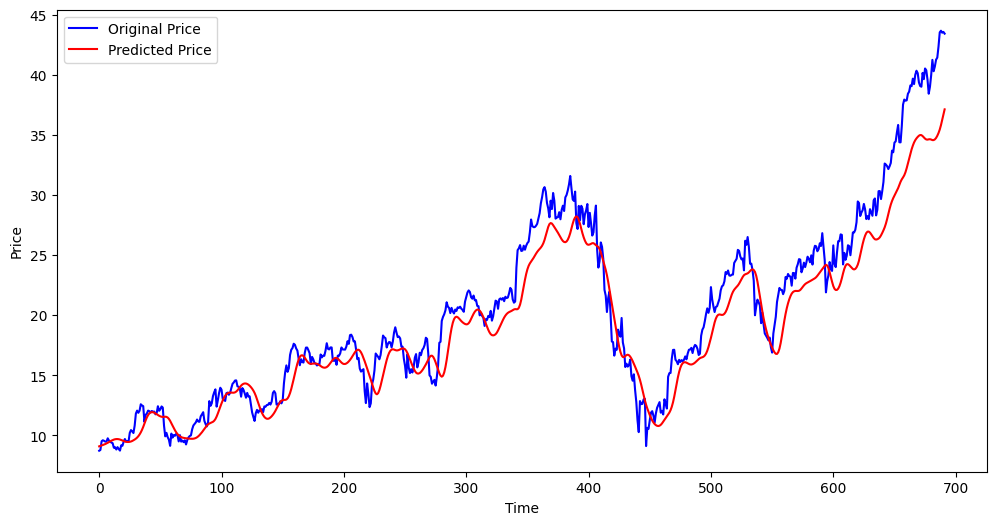

In [40]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show